In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
dataset = pd.read_csv("/Users/abhinay/Desktop/AI assignment 3/Static_dataset.csv")

In [2]:
print(dataset.shape)
print(dataset.columns)
print(dataset['Target Attack'].unique())
dataset.head()

(268074, 16)
Index(['timestamp', 'FQDN_count', 'subdomain_length', 'upper', 'lower',
       'numeric', 'entropy', 'special', 'labels', 'labels_max',
       'labels_average', 'longest_word', 'sld', 'len', 'subdomain',
       'Target Attack'],
      dtype='object')
[1 0]


,timestamp,FQDN_count,subdomain_length,upper,lower,numeric,entropy,special,labels,labels_max,labels_average,longest_word,sld,len,subdomain,Target Attack
0,56:19.8,27,10,0,10,11,2.570417,6,6,7,3.666667,2,192,14,1,1
1,07:23.9,27,10,0,10,11,2.767195,6,6,7,3.666667,2,192,14,1,1
2,23:15.1,26,9,0,10,10,2.742338,6,6,7,3.500000,2,192,13,1,0
3,04:51.9,27,10,0,10,11,2.570417,6,6,7,3.666667,2,192,14,1,1
4,12:44.0,15,9,0,11,0,2.929439,4,3,5,4.333333,local,local,15,1,1


In [3]:
summary = dataset.describe()
print(summary)

          FQDN_count  subdomain_length          upper          lower  \
count  268074.000000     268074.000000  268074.000000  268074.000000   
mean       22.286596          6.059021       0.845420      10.410014   
std         6.001205          3.899505       4.941929       3.207725   
min         2.000000          0.000000       0.000000       0.000000   
25%        18.000000          3.000000       0.000000      10.000000   
50%        24.000000          7.000000       0.000000      10.000000   
75%        27.000000         10.000000       0.000000      10.000000   
max        36.000000         23.000000      32.000000      34.000000   

             numeric        entropy        special         labels  \
count  268074.000000  268074.000000  268074.000000  268074.000000   
mean        6.497586       2.485735       4.533577       4.788823   
std         4.499866       0.407709       2.187683       1.803256   
min         0.000000       0.219195       0.000000       1.000000   
25%   

In [4]:
unique_values_count = dataset['Target Attack'].value_counts()
print(unique_values_count)

Target Attack
1    147179
0    120895
Name: count, dtype: int64


In [5]:
import pandas as pd

string_columns = dataset.select_dtypes(include=['object'])

for column in string_columns.columns:
    if any(string_columns[column].apply(lambda x: isinstance(x, str))):
        print(f"Column '{column}' contains strings.")


Column 'timestamp' contains strings.
Column 'longest_word' contains strings.
Column 'sld' contains strings.


In [6]:
print(len(dataset['sld'].unique()))

11112


In [5]:
dataset.isnull().sum()

timestamp           0
FQDN_count          0
subdomain_length    0
upper               0
lower               0
numeric             0
entropy             0
special             0
labels              0
labels_max          0
labels_average      0
longest_word        8
sld                 0
len                 0
subdomain           0
Target Attack       0
dtype: int64

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268074 entries, 0 to 268073
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   timestamp         268074 non-null  object 
 1   FQDN_count        268074 non-null  int64  
 2   subdomain_length  268074 non-null  int64  
 3   upper             268074 non-null  int64  
 4   lower             268074 non-null  int64  
 5   numeric           268074 non-null  int64  
 6   entropy           268074 non-null  float64
 7   special           268074 non-null  int64  
 8   labels            268074 non-null  int64  
 9   labels_max        268074 non-null  int64  
 10  labels_average    268074 non-null  float64
 11  longest_word      268066 non-null  object 
 12  sld               268074 non-null  object 
 13  len               268074 non-null  int64  
 14  subdomain         268074 non-null  int64  
 15  Target Attack     268074 non-null  int64  
dtypes: float64(2), int64

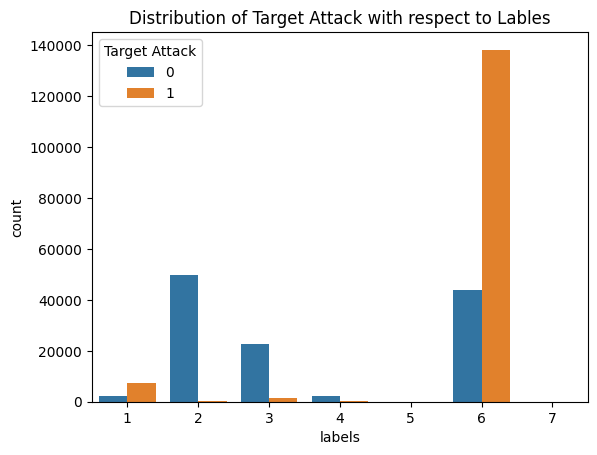

In [8]:
sns.countplot(data = dataset, x="labels", hue = "Target Attack")
plt.title("Distribution of Target Attack with respect to Lables")
plt.show()


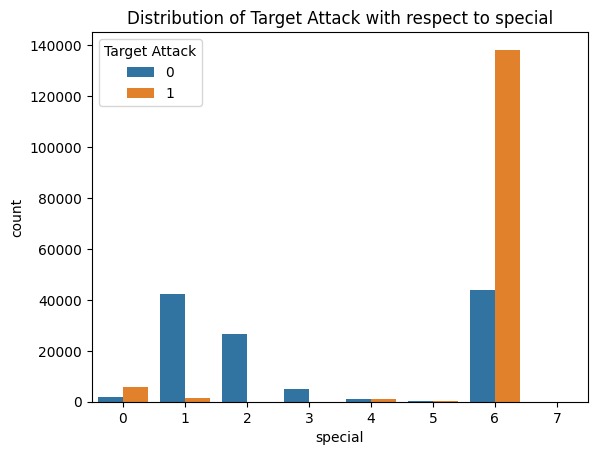

In [9]:
sns.countplot(data = dataset, x="special", hue = "Target Attack")
plt.title("Distribution of Target Attack with respect to special")
plt.show()

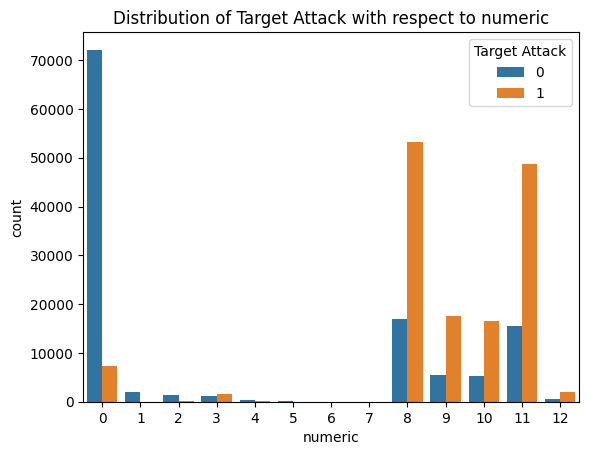

In [10]:
sns.countplot(data = dataset, x="numeric", hue = "Target Attack")
plt.title("Distribution of Target Attack with respect to numeric")
plt.show()

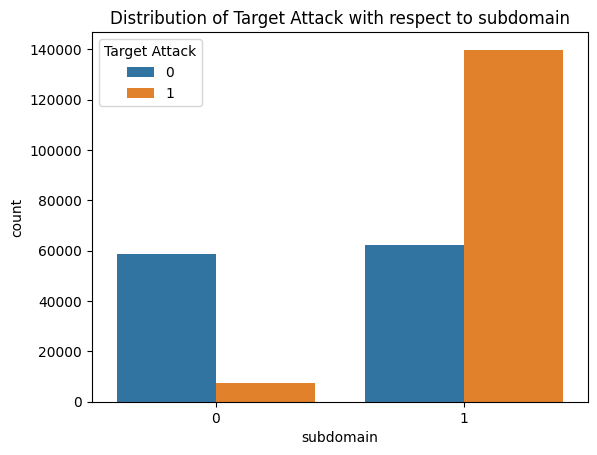

In [11]:
sns.countplot(data = dataset, x="subdomain", hue = "Target Attack")
plt.title("Distribution of Target Attack with respect to subdomain")
plt.show()

<Axes: xlabel='FQDN_count', ylabel='entropy'>

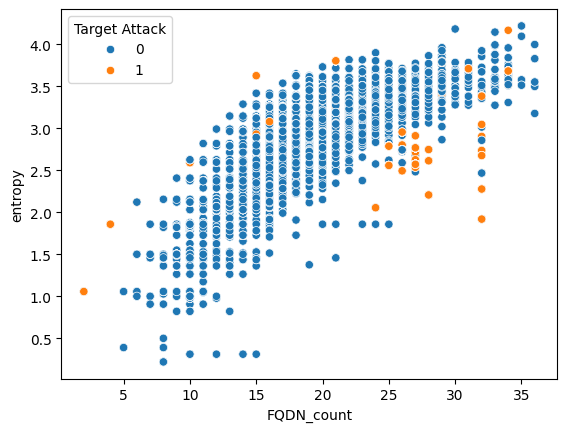

In [13]:
sns.scatterplot(data=dataset, x = "FQDN_count", y = "entropy", hue = "Target Attack")

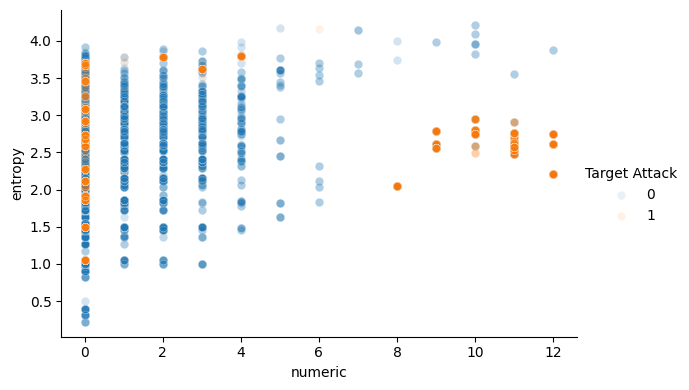

In [14]:
g = sns.FacetGrid(data=dataset, hue="Target Attack", height=4, aspect=1.5)
g.map(sns.scatterplot, "numeric", "entropy", alpha=0.1)
g.add_legend()

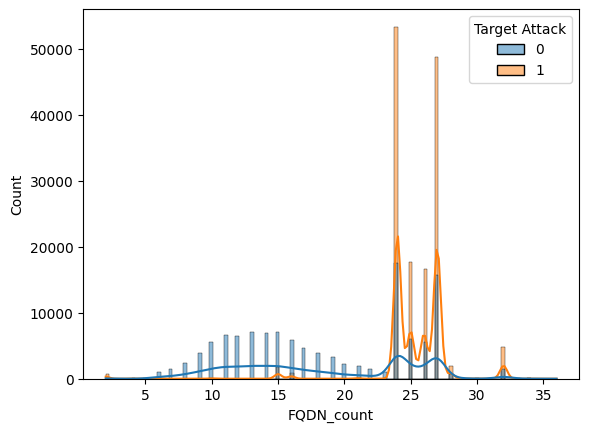

In [15]:
sns.histplot(data = dataset, x = "FQDN_count", kde = True, hue = 'Target Attack')
plt.show()

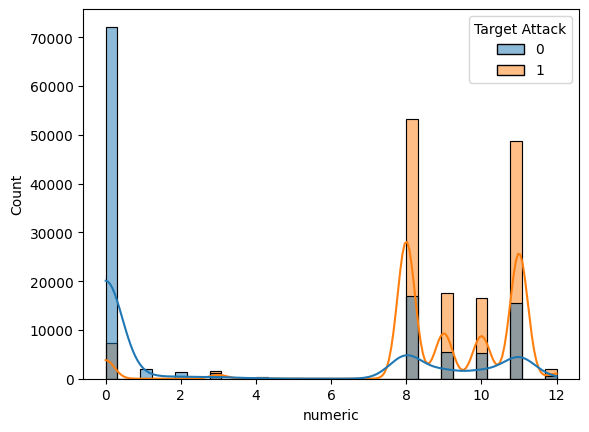

In [16]:
sns.histplot(data = dataset, x = "numeric", kde = True, hue = 'Target Attack')
plt.show()

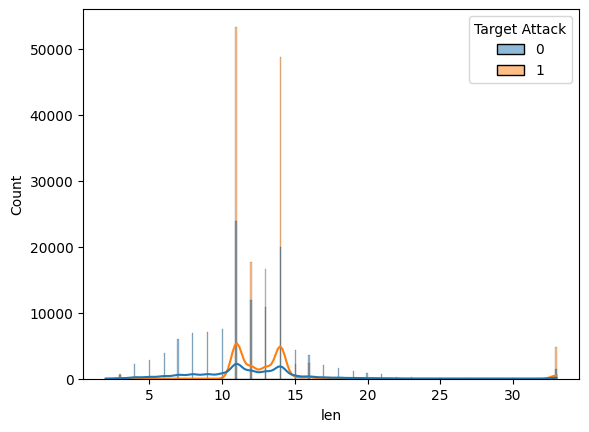

In [41]:
sns.histplot(data = dataset, x = "len", kde = True, hue = 'Target Attack')
plt.show()

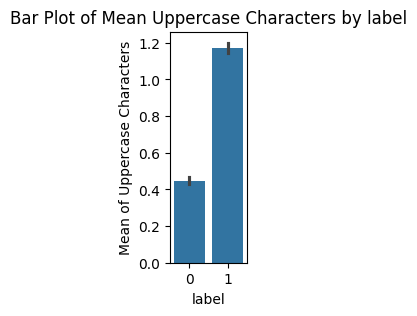

In [20]:
plt.figure(figsize=(1, 3))
sns.barplot(data=dataset, x="Target Attack", y="upper")
plt.xlabel("label")
plt.ylabel("Mean of Uppercase Characters")
plt.title("Bar Plot of Mean Uppercase Characters by label")
plt.show()
# consider this 

/var/folders/27/cnc3q2r54h9890r55ky508400000gp/T/ipykernel_97849/2862632269.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=dataset, x="Target Attack", y="lower", ci=None)


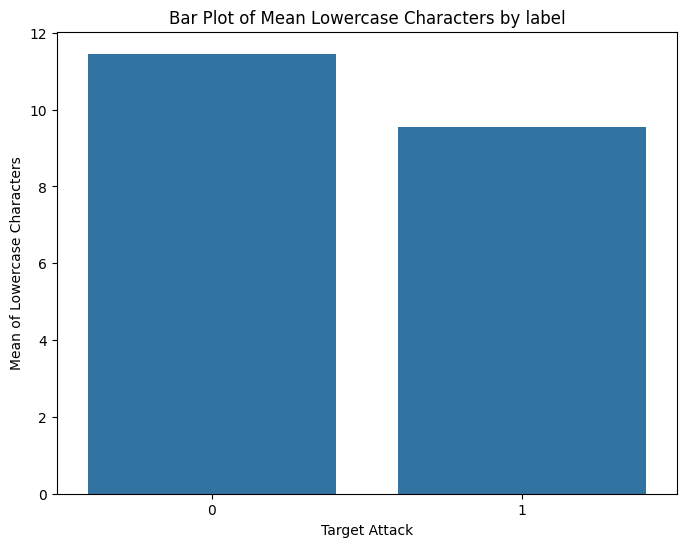

In [25]:
plt.figure(figsize=(8, 6))
sns.barplot(data=dataset, x="Target Attack", y="lower", ci=None)
plt.xlabel("Target Attack")
plt.ylabel("Mean of Lowercase Characters")
plt.title("Bar Plot of Mean Lowercase Characters by label")
plt.show()

/var/folders/27/cnc3q2r54h9890r55ky508400000gp/T/ipykernel_97849/1486574452.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=dataset, x="Target Attack", y="FQDN_count", ci=None)


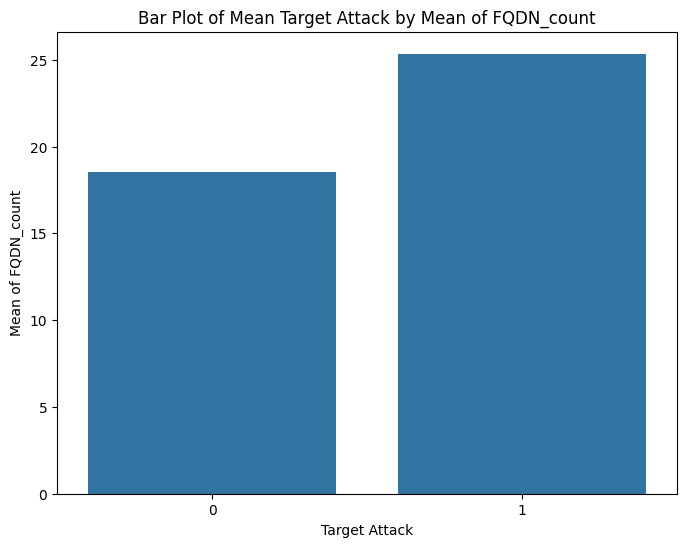

In [28]:
plt.figure(figsize=(8, 6))
sns.barplot(data=dataset, x="Target Attack", y="FQDN_count", ci=None)
plt.xlabel("Target Attack")
plt.ylabel("Mean of FQDN_count")
plt.title("Bar Plot of Mean Target Attack by Mean of FQDN_count")
plt.show()

/var/folders/27/cnc3q2r54h9890r55ky508400000gp/T/ipykernel_97849/3468642138.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=dataset, x="Target Attack", y="len", ci=None)


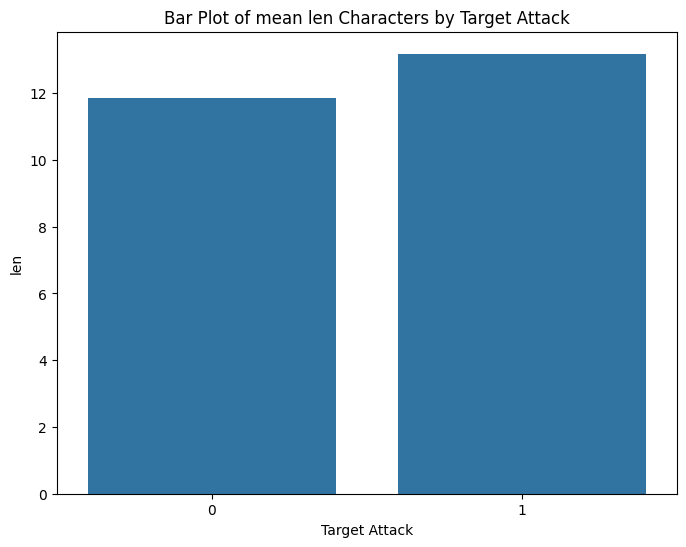

In [27]:
plt.figure(figsize=(8, 6))
sns.barplot(data=dataset, x="Target Attack", y="len", ci=None)
plt.xlabel("Target Attack")
plt.ylabel("len")
plt.title("Bar Plot of mean len Characters by Target Attack")
plt.show()

/var/folders/27/cnc3q2r54h9890r55ky508400000gp/T/ipykernel_1241/3140642841.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=dataset, x="Target Attack", y="special", ci=None)


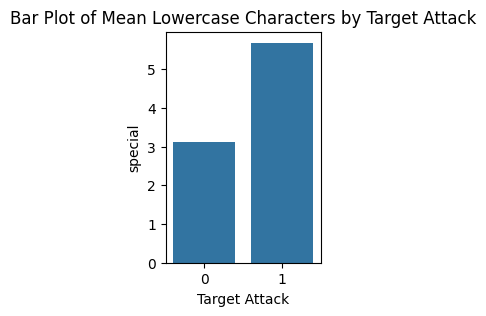

In [41]:
plt.figure(figsize=(2, 3))
sns.barplot(data=dataset, x="label", y="special", ci=None)
plt.xlabel("label")
plt.ylabel("special")
plt.title("Bar Plot of Mean Lowercase Characters by label")
plt.show()

/var/folders/27/cnc3q2r54h9890r55ky508400000gp/T/ipykernel_1241/3071212718.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=dataset, x="Target Attack", y="labels", ci=None)


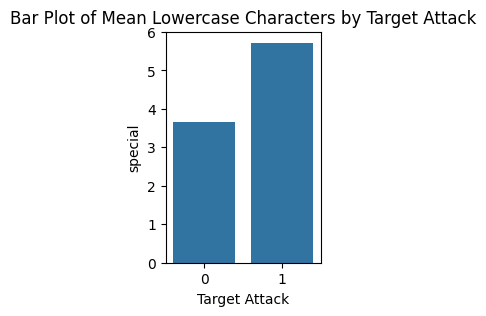

In [42]:
plt.figure(figsize=(2, 3))
sns.barplot(data=dataset, x="label", y="labels", ci=None)
plt.xlabel("label")
plt.ylabel("labels")
plt.title("Bar Plot of Mean Lowercase Characters by label")
plt.show()

/var/folders/27/cnc3q2r54h9890r55ky508400000gp/T/ipykernel_1241/2088480711.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=dataset, x="Target Attack", y="entropy", ci=None)


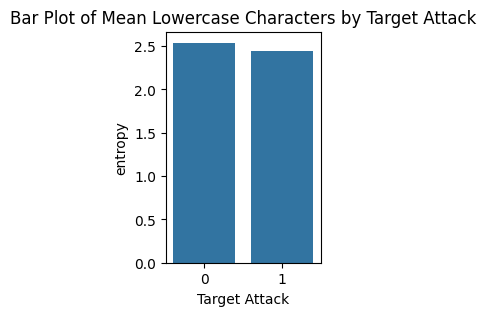

In [48]:
plt.figure(figsize=(2, 3))
sns.barplot(data=dataset, x="label", y="entropy", ci=None)
plt.xlabel("label")
plt.ylabel("entropy")
plt.title("Bar Plot of Mean Lowercase Characters by label")
plt.show()
# Ignore this

/var/folders/27/cnc3q2r54h9890r55ky508400000gp/T/ipykernel_97849/2735556428.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=dataset, x="Target Attack", y="numeric", ci=None)


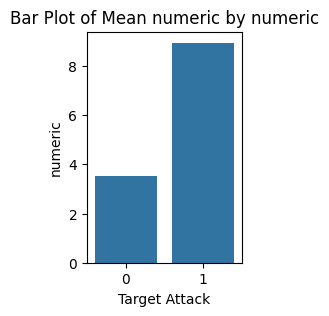

In [23]:
plt.figure(figsize=(2, 3))
sns.barplot(data=dataset, x="Target Attack", y="numeric", ci=None)
plt.xlabel("Target Attack")
plt.ylabel("numeric")
plt.title("Bar Plot of Mean numeric by numeric")
plt.show()
# consider this 

In [3]:
dataset['timestamp'] = dataset['timestamp'].str.split(':').str[0]

dataset['timestamp'] = dataset['timestamp'].astype(int)
unique_values = dataset['timestamp'].unique()
print(len(unique_values), unique_values)



60 [56  7 23  4 12 16 26 57 27 21  9 40 50 17 37 54  1 35 13  3 58 38 49 22
 29 39 46  2 34 32 48 20 31  8 18 51 28 25 33  5 10  0 11 24 36 53 55 59
 14 45 15 52 30  6 19 43 42 47 44 41]


In [3]:
dataset['len_longest_word'] = dataset['longest_word'].apply(lambda x: len(str(x)))
dataset['len_sld'] = dataset['sld'].apply(lambda x: len(str(x)))
Y = dataset['Target Attack']
columns_to_exclude = ['timestamp', 'longest_word', 'sld', 'Target Attack', 'entropy', 'subdomain', 'upper']
X = dataset.drop(columns=columns_to_exclude).copy()

In [33]:
X.head()

,FQDN_count,subdomain_length,lower,numeric,special,labels,labels_max,labels_average,len,len_longest_word,len_sld
0,27,10,10,11,6,6,7,3.666667,14,1,3
1,27,10,10,11,6,6,7,3.666667,14,1,3
2,26,9,10,10,6,6,7,3.500000,13,1,3
3,27,10,10,11,6,6,7,3.666667,14,1,3
4,15,9,11,0,4,3,5,4.333333,15,5,5


In [107]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to your data and transform it
standardized_data = scaler.fit_transform(X)

In [34]:
print(X)

        FQDN_count  subdomain_length  lower  numeric  special  labels  \
0               27                10     10       11        6       6   
1               27                10     10       11        6       6   
2               26                 9     10       10        6       6   
3               27                10     10       11        6       6   
4               15                 9     11        0        4       3   
...            ...               ...    ...      ...      ...     ...   
268069          18                 3     16        0        2       3   
268070          27                10     10       11        6       6   
268071          27                10     10       11        6       6   
268072          16                 0     14        0        2       2   
268073          27                10     10       11        6       6   

        labels_max  labels_average  len  len_longest_word  len_sld  
0                7        3.666667   14               

In [17]:
from sklearn.decomposition import PCA
pca = PCA(n_components=9)
pca.fit(X)
pca_data = pca.transform(X)


In [18]:
variance_ratio = pca.explained_variance_ratio_
print(variance_ratio)

[5.32554865e-01 3.77772101e-01 7.11747009e-02 9.66664698e-03
 4.26663541e-03 2.89636362e-03 9.37839428e-04 4.68906008e-04
 2.27627849e-04]


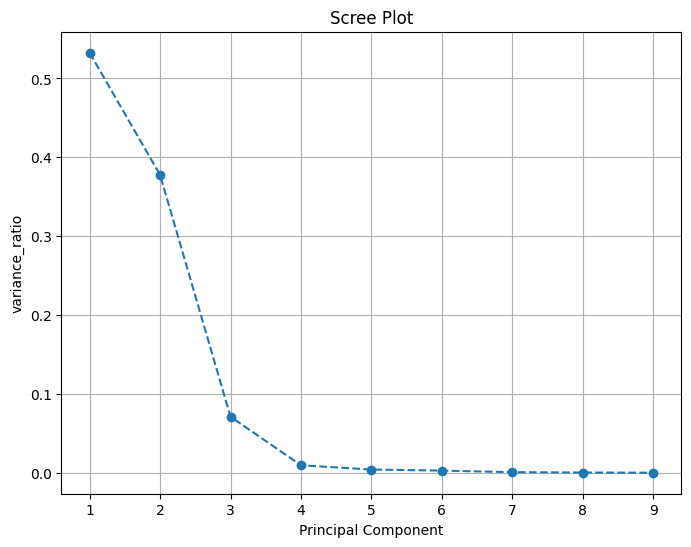

In [19]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(variance_ratio) + 1), variance_ratio, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('variance_ratio')
plt.xticks(range(1, len(variance_ratio) + 1))
plt.grid(True)

plt.show()

In [4]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
features = SelectKBest(f_classif, k=9)
X = features.fit_transform(X, Y)


In [24]:
feature_names = dataset.columns
feature_indices = features.get_support(indices=True)
selected_features = [X.columns[i] for i in feature_indices]

In [27]:
print(selected_features)

['FQDN_count', 'subdomain_length', 'lower', 'numeric', 'special', 'labels', 'len', 'len_longest_word', 'len_sld']
[ 0  1  2  3  4  5  8  9 10]


In [6]:
print(X)

[[27. 10. 10. ... 14.  1.  3.]
 [27. 10. 10. ... 14.  1.  3.]
 [26.  9. 10. ... 13.  1.  3.]
 ...
 [27. 10. 10. ... 14.  1.  3.]
 [16.  0. 14. ... 14.  5. 13.]
 [27. 10. 10. ... 14.  1.  3.]]


In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

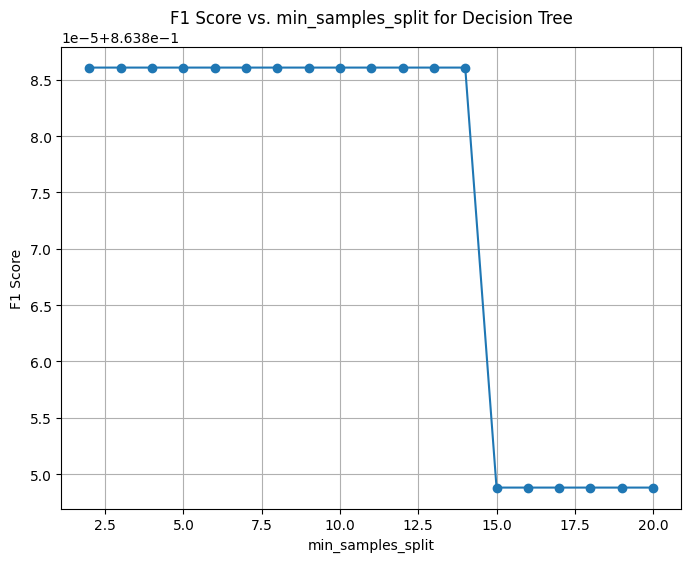

Best min_samples_split: 2


In [28]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score

# Define a range of min_samples_split values to test
min_samples_split_values = range(2, 21)

# Create lists to store F1 scores for different min_samples_split values
f1_scores = []

for min_samples_split in min_samples_split_values:
    # Create a Decision Tree model with the current min_samples_split value
    dt_model = DecisionTreeClassifier(min_samples_split=min_samples_split, max_depth=6, random_state=42)
    
    # Fit the model on the training data
    dt_model.fit(X_train, y_train)
    
    # Make predictions on the test data
    y_pred = dt_model.predict(X_test)
    
    # Calculate the F1 score for this model
    f1 = f1_score(y_test, y_pred)
    
    # Store the F1 score
    f1_scores.append(f1)

# Plot the F1 scores against min_samples_split values
plt.figure(figsize=(8, 6))
plt.plot(min_samples_split_values, f1_scores, marker='o', linestyle='-')
plt.title('F1 Score vs. min_samples_split for Decision Tree')
plt.xlabel('min_samples_split')
plt.ylabel('F1 Score')
plt.grid(True)
plt.show()

# Find the min_samples_split with the highest F1 score
best_min_samples_split = min_samples_split_values[f1_scores.index(max(f1_scores))]
print(f"Best min_samples_split: {best_min_samples_split}")


In [6]:
from sklearn.tree import DecisionTreeClassifier
DT_Model = DecisionTreeClassifier(min_samples_split=2, max_depth=6, criterion="entropy")
DT_Model.fit(X, Y)

DecisionTreeClassifier(criterion='entropy', max_depth=6)

In [46]:
feature_importance = DT_Model.feature_importances_
print(feature_importance)

[3.39490905e-02 2.95741317e-02 9.79627586e-03 3.13522569e-05
 3.74928949e-03 6.27124262e-03 4.63875166e-04 2.28505116e-03
 3.52582314e-04 9.12679388e-01 8.47720473e-04]


In [16]:
from sklearn.ensemble import RandomForestClassifier
RFC_Model = RandomForestClassifier(n_estimators=1, max_depth=9, min_samples_split=2, random_state=42)
RFC_Model.fit(X, Y)

RandomForestClassifier(max_depth=9, n_estimators=1, random_state=42)

In [55]:
import pickle
# Replace 'your_model' with the name of your trained model
with open('your_model.pkl', 'wb') as model_file:
    pickle.dump(RFC_Model, model_file)


In [56]:
with open('your_model.pkl', 'rb') as model_file:
    RFC_file = pickle.load(model_file)


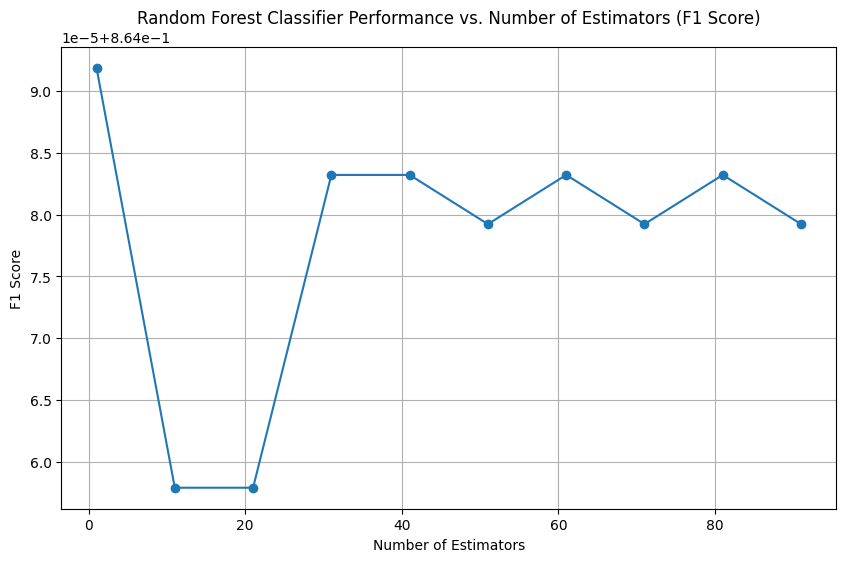

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

# Assuming you have your features (X) and labels (y) loaded from your dataset
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize empty lists to store the results
estimator_range = range(1, 101, 10)  # Vary the number of estimators from 1 to 100
f1_scores = []

# Train Random Forest models with different numbers of estimators and record their performance
for n_estimators in estimator_range:
    rfc = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    rfc.fit(X_train, y_train)
    y_pred = rfc.predict(X_test)
    f1 = f1_score(y_test, y_pred)
    f1_scores.append(f1)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(estimator_range, f1_scores, marker='o', linestyle='-')
plt.title('Random Forest Classifier Performance vs. Number of Estimators (F1 Score)')
plt.xlabel('Number of Estimators')
plt.ylabel('F1 Score')
plt.grid(True)
plt.show()


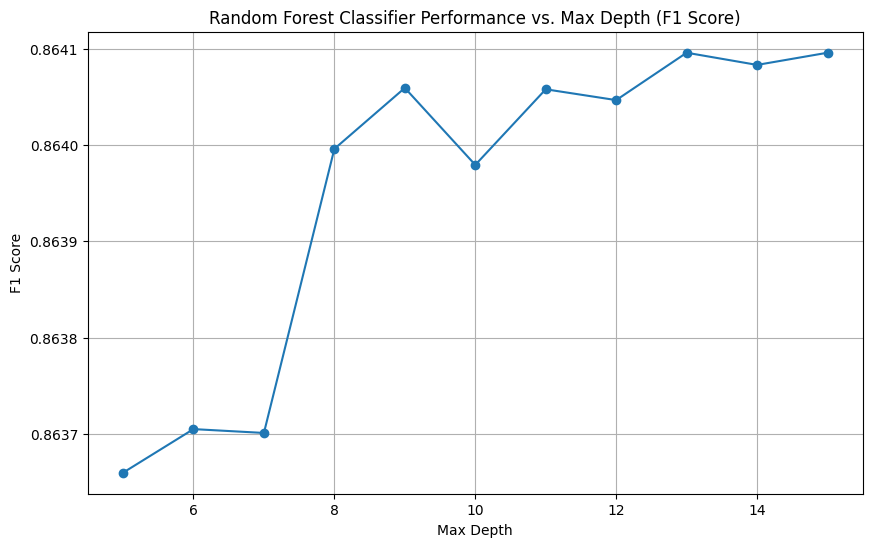

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

# Assuming you have your features (X) and labels (y) loaded from your dataset
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize empty lists to store the results
max_depth_range = range(5, 16)  # Vary the max depth from 5 to 15
f1_scores = []

# Train Random Forest models with max depth in the specified range and a fixed number of estimators (1)
for max_depth in max_depth_range:
    rfc = RandomForestClassifier(n_estimators=1, max_depth=max_depth, random_state=42)
    rfc.fit(X_train, y_train)
    y_pred = rfc.predict(X_test)
    f1 = f1_score(y_test, y_pred)
    f1_scores.append(f1)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(max_depth_range, f1_scores, marker='o', linestyle='-')
plt.title('Random Forest Classifier Performance vs. Max Depth (F1 Score)')
plt.xlabel('Max Depth')
plt.ylabel('F1 Score')
plt.grid(True)
plt.show()


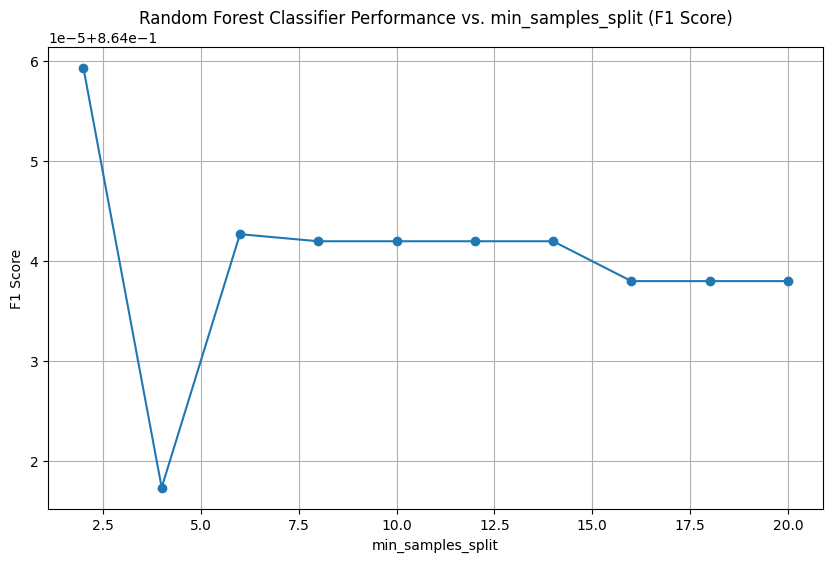

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

# Assuming you have your features (X) and labels (y) loaded from your dataset
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize empty lists to store the results
min_samples_split_range = range(2, 21, 2)  # Vary min_samples_split from 2 to 20
f1_scores = []

# Train Random Forest models with min_samples_split in the specified range and fixed number of estimators (1) and max depth (9)
for min_samples_split in min_samples_split_range:
    rfc = RandomForestClassifier(n_estimators=1, max_depth=9, min_samples_split=min_samples_split, random_state=42)
    rfc.fit(X_train, y_train)
    y_pred = rfc.predict(X_test)
    f1 = f1_score(y_test, y_pred)
    f1_scores.append(f1)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(min_samples_split_range, f1_scores, marker='o', linestyle='-')
plt.title('Random Forest Classifier Performance vs. min_samples_split (F1 Score)')
plt.xlabel('min_samples_split')
plt.ylabel('F1 Score')
plt.grid(True)
plt.show()


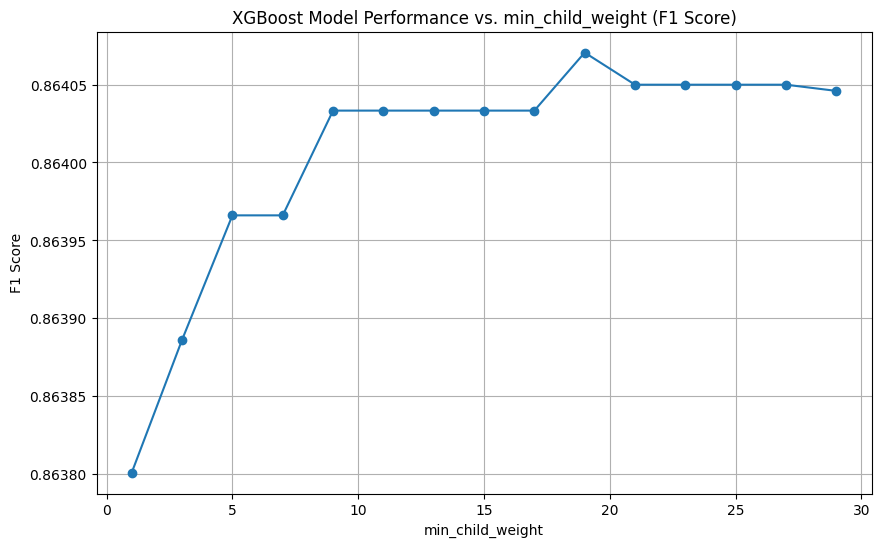

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import f1_score

# Assuming you have your features (X) and labels (y) loaded from your dataset
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize empty lists to store the results
n_estimators_range = range(1, 31, 2)  # Vary min_child_weight from 1 to 20
f1_scores = []

# Train XGBoost models with min_child_weight in the specified range and fixed number of estimators (1) and max depth (9)
for n_est in n_estimators_range:
    xgb_model = xgb.XGBClassifier(n_estimators=n_est, random_state=42)
    xgb_model.fit(X_train, y_train)
    y_pred = xgb_model.predict(X_test)
    f1 = f1_score(y_test, y_pred)
    f1_scores.append(f1)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_range, f1_scores, marker='o', linestyle='-')
plt.title('XGBoost Model Performance vs. min_child_weight (F1 Score)')
plt.xlabel('min_child_weight')
plt.ylabel('F1 Score')
plt.grid(True)
plt.show()


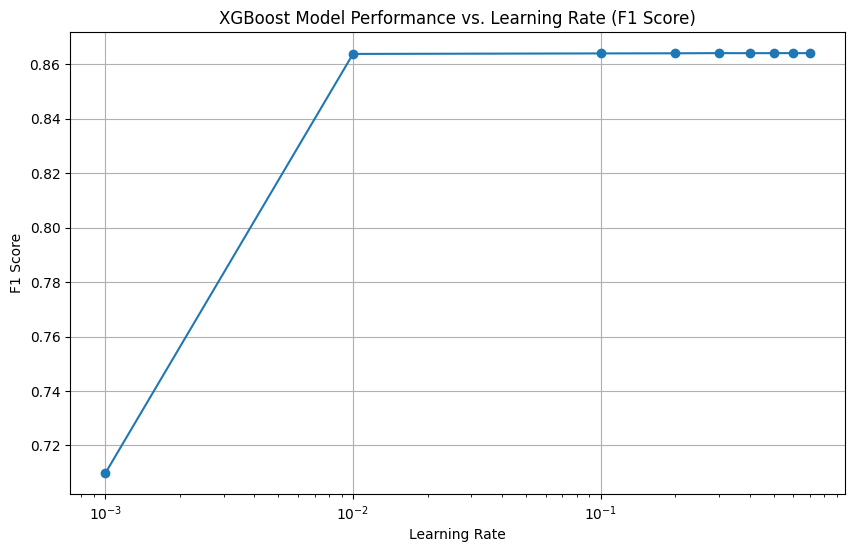

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import f1_score

# Assuming you have your features (X) and labels (y) loaded from your dataset
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize empty lists to store the results
learning_rate_range = [0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]  # Vary learning rate
f1_scores = []

# Train XGBoost models with different learning rates and fixed hyperparameters
for lr in learning_rate_range:
    xgb_model = xgb.XGBClassifier(n_estimators=19, learning_rate=lr, random_state=42)
    xgb_model.fit(X_train, y_train)
    y_pred = xgb_model.predict(X_test)
    f1 = f1_score(y_test, y_pred)
    f1_scores.append(f1)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(learning_rate_range, f1_scores, marker='o', linestyle='-')
plt.title('XGBoost Model Performance vs. Learning Rate (F1 Score)')
plt.xlabel('Learning Rate')
plt.ylabel('F1 Score')
plt.grid(True)
plt.xscale('log')  # Use a logarithmic scale for learning rates
plt.show()


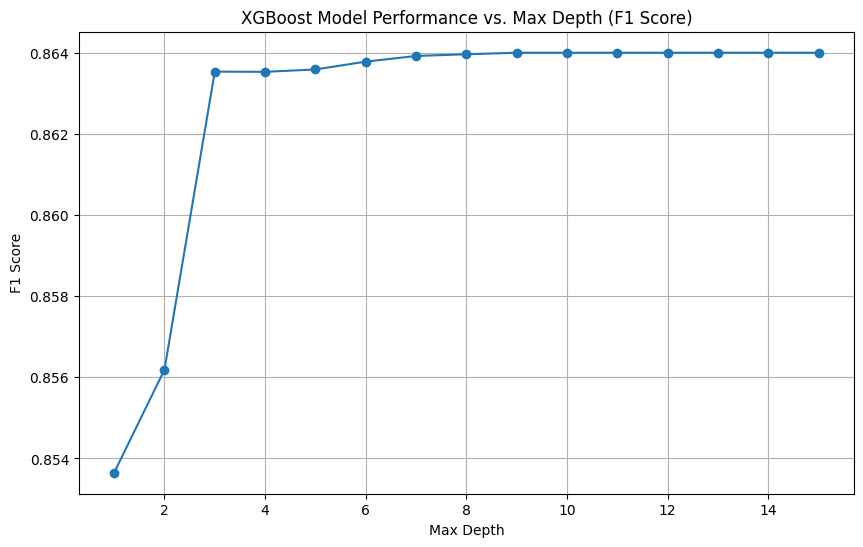

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import f1_score

# Assuming you have your features (X) and labels (y) loaded from your dataset
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize empty lists to store the results
max_depth_range = range(1, 16)  # Vary max depth from 1 to 15
f1_scores = []

# Train XGBoost models with different max depths and fixed hyperparameters
for max_depth in max_depth_range:
    xgb_model = xgb.XGBClassifier(n_estimators=19, max_depth=max_depth, learning_rate=0.01, random_state=42)
    xgb_model.fit(X_train, y_train)
    y_pred = xgb_model.predict(X_test)
    f1 = f1_score(y_test, y_pred)
    f1_scores.append(f1)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(max_depth_range, f1_scores, marker='o', linestyle='-')
plt.title('XGBoost Model Performance vs. Max Depth (F1 Score)')
plt.xlabel('Max Depth')
plt.ylabel('F1 Score')
plt.grid(True)
plt.show()


In [13]:
from xgboost import XGBClassifier
XGB_Model = XGBClassifier(n_estimators=19, learning_rate=0.01, max_depth=9)
XGB_Model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=19, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [14]:
y_DT_pred = DT_Model.predict(X_test)
y_RFC_pred = RFC_Model.predict(X_test)
y_XGB_pred = XGB_Model.predict(X_test)

In [15]:
from sklearn.metrics import f1_score, precision_score, recall_score

print(f'DT_Model_f1_score {f1_score(y_test, y_DT_pred)}')
print(f'DT_Model_precision {precision_score(y_test, y_DT_pred)}')
print(f'DT_Model_recall {recall_score(y_test, y_DT_pred)}')
print(f'RFC_Model_f1_score {f1_score(y_test, y_RFC_pred)}')
print(f'RFC_Model_precision {precision_score(y_test, y_RFC_pred)}')
print(f'RFC_Model_recall {recall_score(y_test, y_RFC_pred)}')
print(f'XGB_Model_f1_score {f1_score(y_test, y_XGB_pred)}')
print(f'XGB_Model_precision {precision_score(y_test, y_XGB_pred)}')
print(f'XGB_Model_recall {recall_score(y_test, y_XGB_pred)}')

DT_Model_f1_score 0.8639320246117784
DT_Model_precision 0.760713087897629
DT_Model_recall 0.9995593070951557
RFC_Model_f1_score 0.8640593174391513
RFC_Model_precision 0.7609694404294859
RFC_Model_recall 0.9994576087324994
XGB_Model_f1_score 0.8640705578996718
XGB_Model_precision 0.760869004308899
XGB_Model_recall 0.9996610054578121


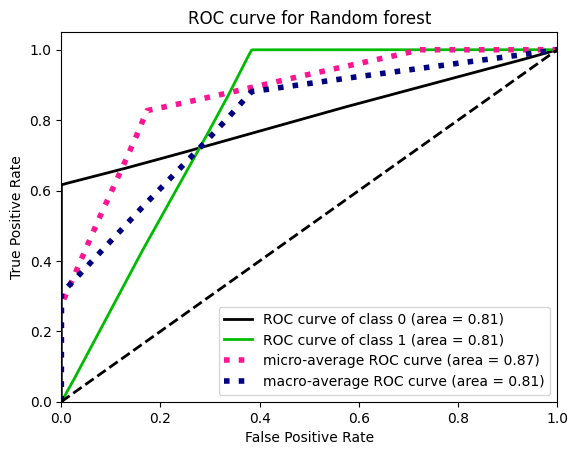

In [62]:
from scikitplot.metrics import plot_roc
plot_roc(y_test, rfc_test_proba)
plt.title("ROC curve for Random forest")
plt.show()